#**Initialization**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [0]:
url = 'https://raw.githubusercontent.com/hasobi/skripsi/master/dataset/KDDTrain%2B_v1.csv'

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
# df = pd.read_csv('/content/drive/My Drive/Tugas Akhir a.k.a SKRIPSI/dataset/KDDTrain+_v1.csv')

df = pd.read_csv(url)

In [0]:
data = df

In [0]:
# dicitionary untuk merubah tipe serangan menjadi lebih umum seperti Normal, DoS, Probe, U2R, dan R2L

attack_dict={ #DOS
    'back' : 'dos',
    'land' : 'dos',
    'neptune' : 'dos',
    'pod' : 'dos',
    'smurf' : 'dos',
    'teardrop' : 'dos',
    'apache2' : 'dos',
    'udpstorm' : 'dos',
    'processtable' : 'dos',
    'worm' : 'dos',
    'mailbomb' : 'dos',
    
    #probe
    'satan' : 'probe',
    'ipsweep' : 'probe',
    'nmap' : 'probe',
    'portsweep' : 'probe',
    'mscan' : 'probe',
    'saint' : 'probe',
    
    #R2L
    'guess_passwd' : 'r2l',
    'ftp_write' : 'r2l',
    'imap' : 'r2l',
    'phf' : 'r2l',
    'multihop' : 'r2l',
    'warezmaster' : 'r2l',
    'warezclient' : 'r2l',
    'spy' : 'r2l',
    'xlock' : 'r2l',
    'xsnoop': 'r2l',
    'snmpguess' : 'r2l',
    'snmpgetattack' : 'r2l',
    'httptunnel' : 'r2l',
    'sendmail' : 'r2l',
    'named' : 'r2l',
    
    #U2R
    'buffer_overflow' : 'u2r',
    'loadmodule' : 'u2r',
    'rootkit' : 'u2r',
    'perl' : 'u2r',
    'sqlattack' : 'u2r',
    'xterm' : 'u2r',
    'ps' : 'u2r'
}

data.replace(attack_dict, inplace = True)

In [33]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,normal
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,dos
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,normal
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,dos


# Define Data

In [0]:
data1 = data.loc[data['type_attack'].isin(['normal','dos'])]

In [35]:
data1.drop('num_packet', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [36]:
data1.drop('type_attack', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
protocol_dict ={
    "udp" : 0,
    "tcp" : 1,
    "icmp": 2
}

service_dict={
    "Z39_50" : 0,
    "X11" : 1,
    "whois" : 2,
    "vmnet" : 3,
    "uucp_path" : 4,
    "uucp" : 5,
    "urp_i" : 6,
    "urh_i" : 7,
    "time" : 8,
    "tim_i" : 9,
    "tftp_u" : 10,
    "telnet" : 11,
    "systat" : 12,
    "supdup" : 13,
    "sunrpc" : 14,
    "ssh" : 15,
    "sql_net" : 16,
    "smtp" : 17,
    "shell" : 18,
    "rje" : 19,
    "remote_job" : 20,
    "red_i" : 21,
    "private" : 22,
    "printer" : 23,
    "pop_3" : 24,
    "pop_2" : 25,
    "pm_dump" : 26,
    "other" : 27,
    "ntp_u" : 28,
    "nntp" : 29,
    "nnsp" : 30,
    "netstat" : 31,
    "netbios_ssn" : 32,
    "netbios_ns" : 33,
    "netbios_dgm" : 34,
    "name" : 35,
    "mtp" : 36,
    "login" : 37,
    "link" : 38,
    "ldap" : 39,
    "kshell" : 40,
    "klogin" : 41,
    "iso_tsap" : 42,
    "IRC" : 43,
    "imap4" : 44,
    "http_8001" : 45,
    "http_443" : 46,
    "http_2784" : 47,
    "http" : 48,
    "hostnames" : 49,
    "harvest" : 50,
    "gopher" : 51,
    "ftp_data" : 52,
    "ftp" : 53,
    "finger" :  54,
    "exec" : 55,
    "efs" : 56,
    "ecr_i" : 57,
    "eco_i" : 58,
    "echo" : 59,
    "domain_u" : 60,
    "domain" : 61,
    "discard" : 62,
    "daytime" : 63,
    "ctf" : 64,
    "csnet_ns" : 65,
    "courier" : 66,
    "bgp" : 67,
    "auth" : 68,
    "aol" : 69

}

flag_dict={
    "SH" : 0,
    "SF" : 1,
    "S3" : 2,
    "S2" : 3,
    "S1" : 4,
    "S0" : 5,
    "RSTR" : 6,
    "RSTOS0" : 7,
    "RSTO" : 8,
    "REJ" : 9,
    "OTH" : 10

}

data1.replace(flag_dict, inplace = True)
data1.replace(service_dict, inplace = True)
data1.replace(protocol_dict, inplace = True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


# PCA 41 column  cara lama

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [39]:
# data_src_bytes4 = data_src_bytes3[['normal','dos']]

# Standardizing the features
x = data1.values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=41)
principalComponents = pca.fit_transform(x)

# principalDf = pd.DataFrame(data = principalComponents)

principalDf = pd.DataFrame(data = principalComponents, columns = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate'])
# finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDF = principalDf

# finalDF.reset_index(level=0, inplace=True)
finalDF


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.572030,-0.113497,0.746554,-4.599044,-3.244708,-1.821022,-0.136741,-0.380010,1.291472,0.316671,0.089095,-1.150179,-0.233019,-0.135187,0.813926,-0.395637,-0.949406,0.158991,-0.654922,0.085304,0.162974,0.389737,1.099100,2.821310,-0.658022,0.846989,-0.385754,0.819159,0.113278,-0.352014,0.039969,-0.963147,0.722360,-0.006047,0.034227,-0.017748,0.042224,-0.018583,0.054031,-0.001606,-2.025396e-17
1,3.816695,-1.187686,-0.017001,0.596179,-0.071809,-0.208397,-0.091884,-0.023221,-0.002556,0.025236,-0.041730,0.059256,0.004599,0.007179,-0.120981,0.003342,-0.003555,-0.001279,-0.067978,-0.079793,0.188660,0.047949,0.275674,-0.235544,-0.326614,0.091240,-0.003796,-0.180178,-0.024542,0.027630,0.114135,-0.199279,0.154129,-0.038288,-0.016944,0.002379,0.001301,0.000755,0.004520,0.000848,-4.228949e-17
2,-2.627736,-0.588114,-0.146299,1.130697,0.096293,-0.276581,0.355233,-0.010468,-0.047542,-0.043964,-0.004172,0.155893,0.037547,0.006302,-0.143341,-0.812705,0.305968,-0.069074,-0.223923,-0.074521,-0.040766,0.007316,0.348449,-0.290969,0.767778,0.235028,-0.044065,0.014668,-0.021034,-0.038301,0.069913,-0.091170,-0.104928,0.052555,0.268434,-0.083797,-0.238098,-0.081580,0.025233,0.000425,-1.074602e-16
3,-2.408812,-0.591713,-0.251949,0.355271,0.661953,0.272510,-0.783401,0.097655,-0.204831,-0.258324,0.230269,-0.011730,-0.030603,0.002640,0.190818,0.240959,0.338712,-0.036573,-0.490890,0.020604,-0.023126,-0.081879,-0.571785,0.022220,-0.459966,0.439901,-0.076064,0.117838,-0.029749,0.089900,-0.037159,0.085304,0.065232,-0.015227,0.010703,0.008145,0.022565,-0.004970,-0.002273,0.001975,-1.472210e-16
4,2.144669,7.056901,-0.009669,0.002356,0.017880,0.173285,-0.796322,0.155840,-0.039598,-0.156570,0.217096,-0.249814,-0.000694,0.013126,-0.015900,0.468553,0.282538,-0.030999,-0.505910,-0.099720,0.344292,0.070317,0.165868,0.149263,-0.231662,-0.152185,-0.004025,-0.116074,-0.003736,0.152137,0.139572,-0.231718,0.117152,0.005072,0.041924,-0.002188,0.045803,0.018157,0.003892,0.000045,9.246184e-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113264,3.865583,-1.191075,-0.042497,0.322046,0.167070,-0.041572,0.061032,-0.005641,-0.047674,0.013842,-0.039643,0.078602,0.004109,0.028578,-0.256880,0.138282,-0.096101,-0.009268,-0.089200,-0.122971,0.340587,0.036036,0.230649,-0.217375,-0.111258,0.163923,-0.006923,-0.060366,-0.028417,0.031641,-0.001143,0.032640,-0.023388,0.008188,-0.015628,0.011346,-0.004801,0.002108,-0.001575,0.001031,7.793886e-19
113265,-1.688780,-0.458238,-0.097977,-0.731804,0.159732,-0.270448,-2.055399,0.039122,0.189605,0.575613,-0.569094,0.645422,0.015243,-0.041264,0.698050,-0.310787,-0.224619,0.043507,-0.041683,-0.376423,1.394349,0.272395,1.095116,-0.170675,-1.121066,-0.118534,-0.017238,-0.259713,0.014642,-0.719093,0.029615,0.158109,-0.133378,0.029733,-0.037550,-0.002595,-0.047375,-0.003050,-0.009855,0.003209,5.707925e-19
113266,-0.375499,-0.663823,0.153631,0.355446,-0.881606,-0.429550,-0.811276,0.099759,0.033982,-0.187322,0.366243,-0.414608,0.051816,0.071982,-0.485133,0.590965,0.575371,-0.137126,-1.150575,-0.139709,0.980048,0.044015,-0.399685,0.714535,-0.511080,-0.962211,0.053173,-0.193895,0.039694,0.851130,-0.117678,0.135953,-0.357977,0.148998,-0.878233,-0.861352,0.114385,-0.048985,0.138741,0.003102,1.190215e-18
113267,3.756811,-1.188278,-0.092241,0.432

# PCA 5 terbaik dengan cara beda
[towards datascience](https://towardsdatascience.com/an-approach-to-choosing-the-number-of-components-in-a-principal-component-analysis-pca-3b9f3d6e73fe)

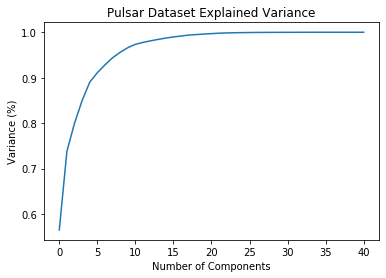

In [40]:
scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(data1.iloc[:,:])

#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [41]:
pca = PCA(n_components=5)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

,column 0,column 1,column 2,column 3,column 4
0,0.188473,0.444017,0.647421,1.096441,0.016609
1,1.705068,-0.278734,-0.088502,-0.087677,-0.024046
2,-1.037544,-0.424769,-0.418468,-0.224334,0.235173
3,-1.047677,-0.308790,0.089864,-0.252247,-0.453711
4,0.301972,2.193213,-0.179477,-0.052003,-0.301176


In [0]:
# '''HOW IT WORKS?'''

In [0]:
# data_mean = np.mean(data_rescaled)

In [0]:
# data_center = data_rescaled - data_mean

# data_center

In [45]:
'''
cov_matrix = np.cov(data_center)

eigenval, eigenvec = np.linalg.eig(cov_matrix)

significance = [np.abs(i)/np.sum(eigenval) for i in eigenval]
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(significance))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

'''

"\ncov_matrix = np.cov(data_center)\n\neigenval, eigenvec = np.linalg.eig(cov_matrix)\n\nsignificance = [np.abs(i)/np.sum(eigenval) for i in eigenval]\n#Plotting the Cumulative Summation of the Explained Variance\nplt.figure()\nplt.plot(np.cumsum(significance))\nplt.xlabel('Number of Components')\nplt.ylabel('Variance (%)') #for each component\nplt.title('Pulsar Dataset Explained Variance')\nplt.show()\n\n"

# PCA 10 paling dominan


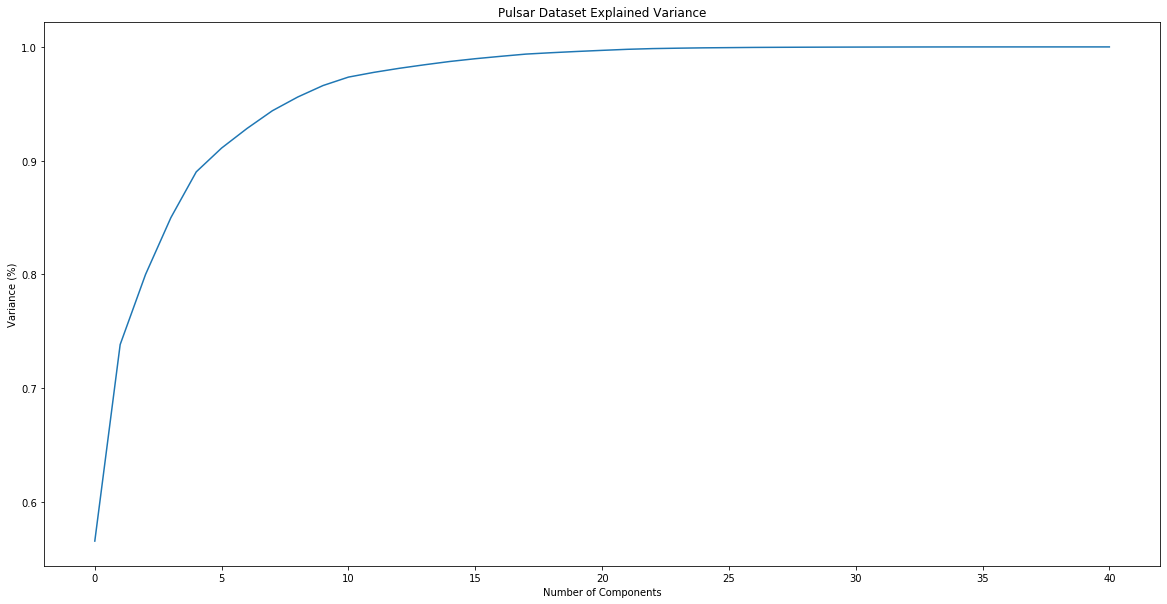

In [46]:
scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(data1.iloc[:,:])

#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance

plt.figure(figsize=(20,10)) 

# plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [47]:
pca = PCA(n_components=10)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.188473,0.444017,0.647420,1.096441,0.016608,0.109830,0.043726,-0.268809,-0.352874,0.717299
1,1.705068,-0.278734,-0.088502,-0.087677,-0.024046,0.086759,0.059994,-0.108643,-0.037670,0.019046
2,-1.037544,-0.424769,-0.418469,-0.224334,0.235172,-0.093547,-0.120637,-0.124779,0.085582,0.030096
3,-1.047677,-0.308790,0.089864,-0.252247,-0.453711,-0.065730,0.048992,0.006543,-0.101855,-0.023447
4,0.301972,2.193213,-0.179477,-0.052003,-0.301176,0.024948,0.052187,-0.109202,-0.002122,-0.004501


# PCA 20 paling dominan

In [48]:
pca = PCA(n_components=20)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17,column 18,column 19
0,0.188473,0.444017,0.647420,1.096441,0.016608,0.109829,0.043725,-0.268810,-0.352869,0.717304,-0.228226,0.090865,-0.148836,-0.143329,0.048137,0.150255,0.056156,0.109531,-0.036056,0.157321
1,1.705068,-0.278734,-0.088502,-0.087677,-0.024046,0.086759,0.059994,-0.108643,-0.037668,0.019047,0.045946,-0.009891,-0.028268,-0.009508,0.023706,-0.004859,0.010683,-0.014633,-0.025800,0.045801
2,-1.037544,-0.424769,-0.418469,-0.224334,0.235172,-0.093547,-0.120637,-0.124779,0.085581,0.030095,-0.006218,0.093513,0.021702,0.040413,0.018772,0.086065,-0.101129,-0.025409,0.015466,0.014262
3,-1.047677,-0.308790,0.089864,-0.252247,-0.453711,-0.065730,0.048992,0.006543,-0.101855,-0.023447,-0.005122,-0.033677,-0.001548,0.015780,-0.013601,0.014743,0.002431,0.020913,0.006496,-0.004352
4,0.301972,2.193213,-0.179477,-0.052003,-0.301176,0.024948,0.052187,-0.109202,-0.002120,-0.004501,0.008668,0.004576,-0.016279,-0.017508,0.011451,0.008284,-0.007846,-0.037247,-0.031509,0.058863


# PCA 41 atau semua atribut

In [49]:
pca = PCA(n_components=41)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17,column 18,column 19,column 20,column 21,column 22,column 23,column 24,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34,column 35,column 36,column 37,column 38,column 39,column 40
0,0.188473,0.444017,0.647420,1.096441,0.016608,0.109829,0.043725,-0.268810,-0.352869,0.717304,-0.228226,0.090865,-0.148836,-0.143329,0.048137,0.150255,0.056156,0.109531,-0.036056,0.157321,0.057765,0.098332,-0.007642,0.037965,0.004564,-0.047922,0.018537,-0.013010,0.000136,0.005116,0.013664,-0.001390,0.001989,-0.001017,0.001911,0.000013,-0.000492,-0.000350,-0.000197,-5.412495e-06,-8.504976e-18
1,1.705068,-0.278734,-0.088502,-0.087677,-0.024046,0.086759,0.059994,-0.108643,-0.037668,0.019047,0.045946,-0.009891,-0.028268,-0.009508,0.023706,-0.004859,0.010683,-0.014633,-0.025800,0.045801,0.019274,0.021144,-0.000202,0.001778,-0.001125,0.001751,0.000585,0.000334,-0.000500,-0.000102,-0.000410,0.000182,0.000088,0.000074,-0.000025,-0.000013,-0.000006,0.000082,0.000004,2.883116e-06,-1.775807e-17
2,-1.037544,-0.424769,-0.418469,-0.224334,0.235172,-0.093547,-0.120637,-0.124779,0.085581,0.030095,-0.006218,0.093513,0.021702,0.040413,0.018772,0.086065,-0.101129,-0.025409,0.015466,0.014262,-0.034417,0.005172,0.001963,-0.011584,-0.062690,-0.004625,-0.012721,-0.000497,-0.001053,-0.000423,0.001127,0.000117,-0.000200,-0.000115,0.000689,-0.000071,0.000037,-0.000261,0.000065,1.239931e-06,-4.512433e-17
3,-1.047677,-0.308790,0.089864,-0.252247,-0.453711,-0.065730,0.048992,0.006543,-0.101855,-0.023447,-0.005122,-0.033677,-0.001548,0.015780,-0.013601,0.014743,0.002431,0.020913,0.006496,-0.004352,0.005187,0.002530,-0.001983,0.003487,0.005254,0.000758,-0.001913,0.000031,0.000164,-0.000838,-0.000659,-0.000083,0.000604,-0.000665,-0.000583,0.000113,-0.000051,0.000109,-0.000030,6.752815e-06,-6.182058e-17
4,0.301972,2.193213,-0.179477,-0.052003,-0.301176,0.024948,0.052187,-0.109202,-0.002120,-0.004501,0.008668,0.004576,-0.016279,-0.017508,0.011451,0.008284,-0.007846,-0.037247,-0.031509,0.058863,0.011057,0.008376,-0.002506,0.006438,0.012491,-0.000561,0.005368,-0.000130,0.002123,0.000359,0.000140,-0.000285,-0.000126,-0.000100,0.000030,0.000005,-0.000033,-0.000096,-0.000014,2.253994e-07,3.882628e-18


# PCA 15 komponen

In [50]:
pca = PCA(n_components=15)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.shape

(113269, 15)

# PCA 41 cara baru

In [51]:
pca = PCA(n_components=41)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.shape

(113269, 41)